## installation of necessary packages

In [ ]:
pip install "giskard>=2.0.0b" -U

In [ ]:
!pip install ctgan

In [ ]:
!pip install table_evaluator

In [ ]:
!pip install sdv

## Import libraries and data

In [ ]:
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
# To download and read the credit scoring dataset
url = 'https://raw.githubusercontent.com/Giskard-AI/examples/main/datasets/credit_scoring_classification_model_dataset/german_credit_prepared.csv'
credit = pd.read_csv(url, sep=',',engine="python")

In [ ]:
column_types = {'account_check_status':"category",
               'duration_in_month':"numeric",
               'credit_history':"category",
               'purpose':"category",
               'credit_amount':"numeric",
               'savings':"category",
               'present_employment_since':"category",
               'installment_as_income_perc':"numeric",
               'sex':"category",
               'personal_status':"category",
               'other_debtors':"category",
               'present_residence_since':"numeric",
               'property':"category",
               'age':"numeric",
               'other_installment_plans':"category",
               'housing':"category",
               'credits_this_bank':"numeric",
               'job':"category",
               'people_under_maintenance':"numeric",
               'telephone':"category",
               'foreign_worker':"category"}


In [ ]:
# Pipeline to fill missing values, transform and scale the numeric columns
columns_to_scale = [key for key in column_types.keys() if column_types[key]=="numeric"]
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline to fill missing values and one hot encode the categorical values
columns_to_encode = [key for key in column_types.keys() if column_types[key]=="category"]
categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)) ])

# Perform preprocessing of the columns with the above pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columns_to_scale),
      ('cat', categorical_transformer, columns_to_encode)
          ]
)


# Simplification and grouping of categories: :


In [ ]:
account_mapping = {
    '< 0 DM': 'negative_balance',
    '0 <= ... < 200 DM': 'low_balance',
    'no checking account': 'no_account',
    '>= 200 DM / salary assignments for at least 1 year': 'high_balance'
}
credit['account_check_status'] = credit['account_check_status'].map(account_mapping)

credit_history_mapping = {
    'critical account/ other credits existing (not at this bank)': 'high_risk',
    'existing credits paid back duly till now': 'low_risk',
    'delay in paying off in the past': 'medium_risk',
    'no credits taken/ all credits paid back duly': 'low_risk',
    'all credits at this bank paid back duly': 'low_risk'
}
credit['credit_history'] = credit['credit_history'].map(credit_history_mapping)

purpose_mapping = {
    'domestic appliances': 'household_appliances',
    '(vacation - does not exist?)': 'no_vacation',
    'radio/television': 'household_appliances',
    'car (new)': 'car_new',
    'car (used)': 'car_used',
    'business': 'business',
    'repairs': 'repairs',
    'education': 'education',
    'furniture/equipment': 'furniture',
    'retraining': 'retraining'
}
credit['purpose'] = credit['purpose'].map(purpose_mapping)

property_mapping = {
    'real estate': 'real_estate',
    'if not A121 : building society savings agreement/ life insurance': 'life_insurance',
    'unknown / no property': 'no_property',
    'if not A121/A122 : car or other, not in attribute 6': 'car_or_other'
}
credit['property'] = credit['property'].map(property_mapping)

employment_mapping = {
    'unemployed': 'unemployed',
    '... < 1 year': '_1',
    '1 <= ... < 4 years': '1_4',
    '4 <= ... < 7 years': '4_7',
    '.. >= 7 years': '7_'
}
credit['present_employment_since'] = credit['present_employment_since'].map(employment_mapping)

savings_mapping = {
    'unknown/ no savings account':'unknown',
    '... < 100 DM':'_100',
    '100 <= ... < 500 DM':'100_500',
    '500 <= ... < 1000 DM':'500_1000',
    '.. >= 1000 DM':'1000_',

}
credit['savings'] = credit['savings'].map(savings_mapping)

# Binarization for columns with only two categories:

In [ ]:
credit['sex'] = credit['sex'].map({'male': 'M', 'female': 'F'})

credit['telephone'] = credit['telephone'].map({'yes, registered under the customers name': 'yes', 'none': 'none'})

credit['default'] = credit['default'].astype('category')
credit['default'] = credit['default'].cat.codes

#Separation of columns according to their type

In [ ]:
categorical_columns = [col for col in credit.columns if credit[col].dtype == 'object']
numeric_columns = [col for col in credit.columns if credit[col].dtype in ['int64', 'float64']]

In [ ]:
credit.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_employment_since', 'installment_as_income_perc', 'sex',
       'personal_status', 'other_debtors', 'present_residence_since',
       'property', 'age', 'other_installment_plans', 'housing',
       'credits_this_bank', 'job', 'people_under_maintenance', 'telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
print(categorical_columns)
print('\n',numeric_columns)

['account_check_status', 'credit_history', 'purpose', 'savings', 'present_employment_since', 'sex', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

 ['duration_in_month', 'credit_amount', 'installment_as_income_perc', 'present_residence_since', 'age', 'credits_this_bank', 'people_under_maintenance']


### normalize  digital data
this part has not been executed because it decreases the results of CTGAN

In [ ]:
''''from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques à normaliser
num_cols = ['duration_in_month', 'credit_amount', 'installment_as_income_perc',
            'present_residence_since', 'age', 'credits_this_bank', 'people_under_maintenance']

# Créez une instance du StandardScaler
scaler = StandardScaler()

# Appliquez le StandardScaler aux colonnes numériques
credit[numeric_columns] = scaler.fit_transform(credit[numeric_columns])

# Affichez les premières lignes de votre dataframe pour vérifier
print(credit.head())


#data verification and preparation

In [ ]:
# Pipeline for the model Logistic Regression
clf_logistic_regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter =1000))])

# Split the data into train and test
Y=credit['default']
X= credit.drop(columns="default")
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,random_state = 30, stratify = Y)

#In this part we run series of code to verify data for debug purposes.

checking for missing values

In [ ]:

missing_values = credit.isnull().sum()
print("Missing values ​​per column:\n", missing_values[missing_values > 0])


Missing values ​​per column:
 Series([], dtype: int64)


Identify numeric columns that contain non-numeric types

In [ ]:
problematic_values = {}
for column in credit.columns:
    if column not in column_types:
        continue
    # If the column is supposed to be numeric
    if column_types[column] == "numeric":
        # Check if all values ​​are numeric
        non_numeric_values = credit[~credit[column].apply(lambda x: isinstance(x, (int, float)))]
        if not non_numeric_values.empty:
            problematic_values[column] = non_numeric_values[column].unique()

if problematic_values:
    for col, values in problematic_values.items():
        print(f"Column {col} contains non-numeric values:")
        print(values)
else:
    print("No non-numeric values ​​found in numeric columns.")


No non-numeric values ​​found in numeric columns.


verification of the presence of string in the numeric columns

In [ ]:
for column, col_type in column_types.items():
    if col_type == "numeric":
        unique_data_types = credit[column].apply(type).unique()
        if str in unique_data_types:
            print(f"Column {column} contains character strings.")


 Enumeration of unique values ​​for numeric columns

In [ ]:

for column, col_type in column_types.items():
    if col_type == "numeric":
        unique_values = credit[column].unique()
        print(f"Column {column} has the following unique values:")
        print(unique_values)
        print("--------------------------------------------------")


Column duration_in_month has the following unique values:
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
--------------------------------------------------
Column credit_amount has the following unique values:
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  176

 Check for NaN, null, or infinite values in numeric columns

In [ ]:
nan_inf_values = {}
numeric_columns = [key for key, value in column_types.items() if value == "numeric"]
for column in numeric_columns:
    nan_values = credit[column].isna().sum()
    inf_values = (credit[column] == float("inf")).sum() + (credit[column] == float("-inf")).sum()

    if nan_values or inf_values:
        nan_inf_values[column] = {
            "NaN_values": nan_values,
            "Inf_values": inf_values
        }

In [ ]:
categorical_feature = [col for col in credit.columns if col in column_types and column_types[col] == "category"]
print(categorical_feature)

['account_check_status', 'credit_history', 'purpose', 'savings', 'present_employment_since', 'sex', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


List unique values ​​for each categorical column

In [ ]:
for column in credit.columns:
    if column in column_types and column_types[column] == "category":
        unique_values = credit[column].unique()
        print(f"Column {column} has the following unique values:")
        print(unique_values)
        print("-" * 50)


Column account_check_status has the following unique values:
['negative_balance' 'low_balance' 'no_account' 'high_balance']
--------------------------------------------------
Column credit_history has the following unique values:
['high_risk' 'low_risk' 'medium_risk']
--------------------------------------------------
Column purpose has the following unique values:
['household_appliances' 'no_vacation' 'car_new' 'car_used' 'business'
 'repairs' 'education' 'furniture' 'retraining']
--------------------------------------------------
Column savings has the following unique values:
['unknown' '_100' '500_1000' '1000_' '100_500']
--------------------------------------------------
Column present_employment_since has the following unique values:
['7_' '1_4' '4_7' 'unemployed' '_1']
--------------------------------------------------
Column sex has the following unique values:
['M' 'F']
--------------------------------------------------
Column personal_status has the following unique values:
[

Checking categorical columns for strings that are numeric

In [ ]:
numeric_strings_in_categorical_columns = {}
for column, col_type in column_types.items():
    if col_type == "category":
        numeric_strings = credit[credit[column].apply(lambda x: isinstance(x, str) and x.isnumeric())][column].unique()
        if len(numeric_strings) > 0:
            numeric_strings_in_categorical_columns[column] = numeric_strings
for column, values in numeric_strings_in_categorical_columns.items():
    print(f"Column {column} contains the following numeric strings: {values}")


# CTGAN model training


classic version of CTGAN

In [ ]:
%%capture output
from ctgan import CTGAN

model = CTGAN(verbose=True)
model.fit(credit,categorical_columns,epochs=800)

In [ ]:
%%capture output
from ctgan import CTGAN

model = CTGAN(
    epochs=1400,
    batch_size=300,
    generator_lr=2e-4,
    generator_decay=6e-5,
    discriminator_lr=2e-4,
    discriminator_steps=1,
    embedding_dim=30,
    generator_dim=(256, 256, 256),
    discriminator_dim=(256, 256, 256),
    verbose=True
)

model.fit(credit,categorical_columns)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Format the output into a table named loss_values
epochs_output = str(output).split('\n')
raw_values = [line.split(',') for line in epochs_output]

loss_values = pd.DataFrame(raw_values)[:-1]
loss_values.columns = ['Epoch', 'Generator Loss', 'Discriminator Loss']
loss_values['Epoch'] = loss_values['Epoch'].str.extract('(\d+)').astype(int)
loss_values['Generator Loss'] = loss_values['Generator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)
loss_values['Discriminator Loss'] = loss_values['Discriminator Loss'].str.extract('([-+]?\d*\.\d+|\d+)').astype(float)

# Calculate the rolling average over the last 50 epochs for both losses
loss_values['Rolling Avg Generator Loss'] = loss_values['Generator Loss'].rolling(window=50).mean()
loss_values['Rolling Avg Discriminator Loss'] = loss_values['Discriminator Loss'].rolling(window=50).mean()

# Graph the table
fig = go.Figure(data=[
    go.Scatter(x=loss_values['Epoch'], y=loss_values['Generator Loss'], name='Generator Loss'),
    go.Scatter(x=loss_values['Epoch'], y=loss_values['Discriminator Loss'], name='Discriminator Loss'),
    go.Scatter(x=loss_values['Epoch'], y=loss_values['Rolling Avg Generator Loss'], name='Rolling Avg Generator Loss Last 50 Epochs', mode='lines', line=dict(color='green')),
    go.Scatter(x=loss_values['Epoch'], y=loss_values['Rolling Avg Discriminator Loss'], name='Rolling Avg Discriminator Loss Last 50 Epochs', mode='lines', line=dict(color='green'))
])

fig.update_layout(title='CTGAN Loss Values', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()


# Save or load the CTGAN Model using Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from joblib import dump
# Save model
dump(model, 'CTGAN_credit.pkl')


['CTGAN_credit.pkl']

In [ ]:
from joblib import load
# load model
model = load('/content/drive/MyDrive/models/CTGAN_credit.pkl')


# generation and evaluation of data with the CTGAN model

In [ ]:
samples = model.sample(50000)

Evaluate data generated using SDV

In [ ]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=credit)
quality_report = evaluate_quality(
    credit,
    samples,metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 231/231 [00:08<00:00, 26.55it/s]

Overall Quality Score: 87.11%

Properties:
- Column Shapes: 90.18%
- Column Pair Trends: 84.05%


Visualize and evaluate the generated data

(1000, 22) (50000, 22)


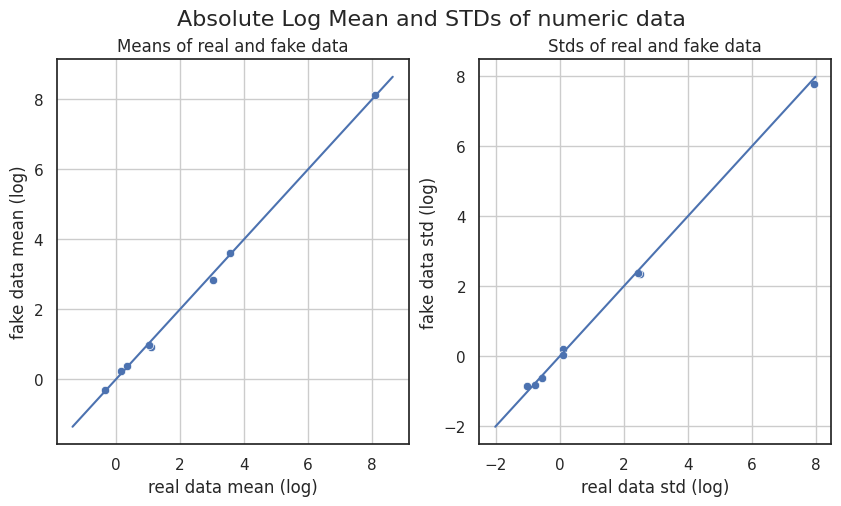

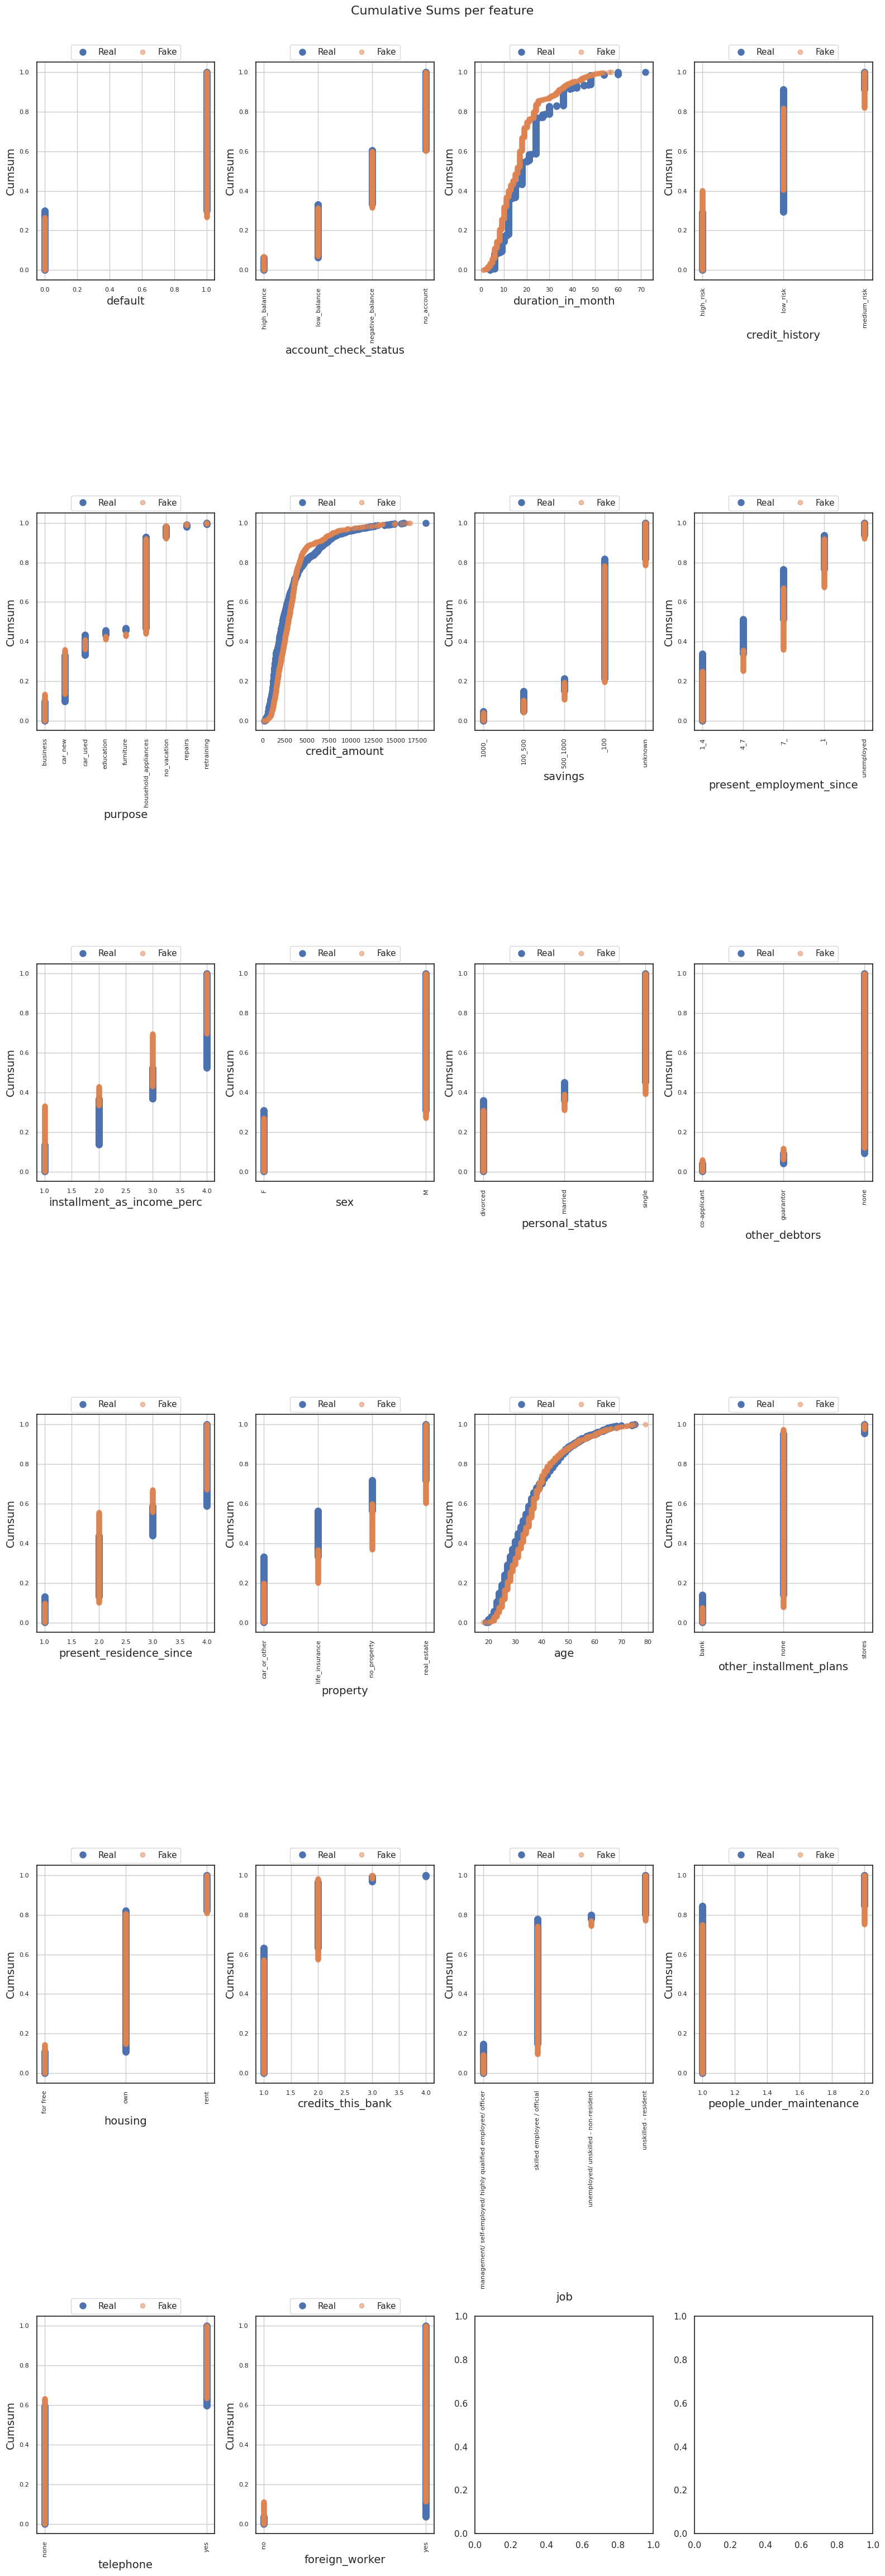

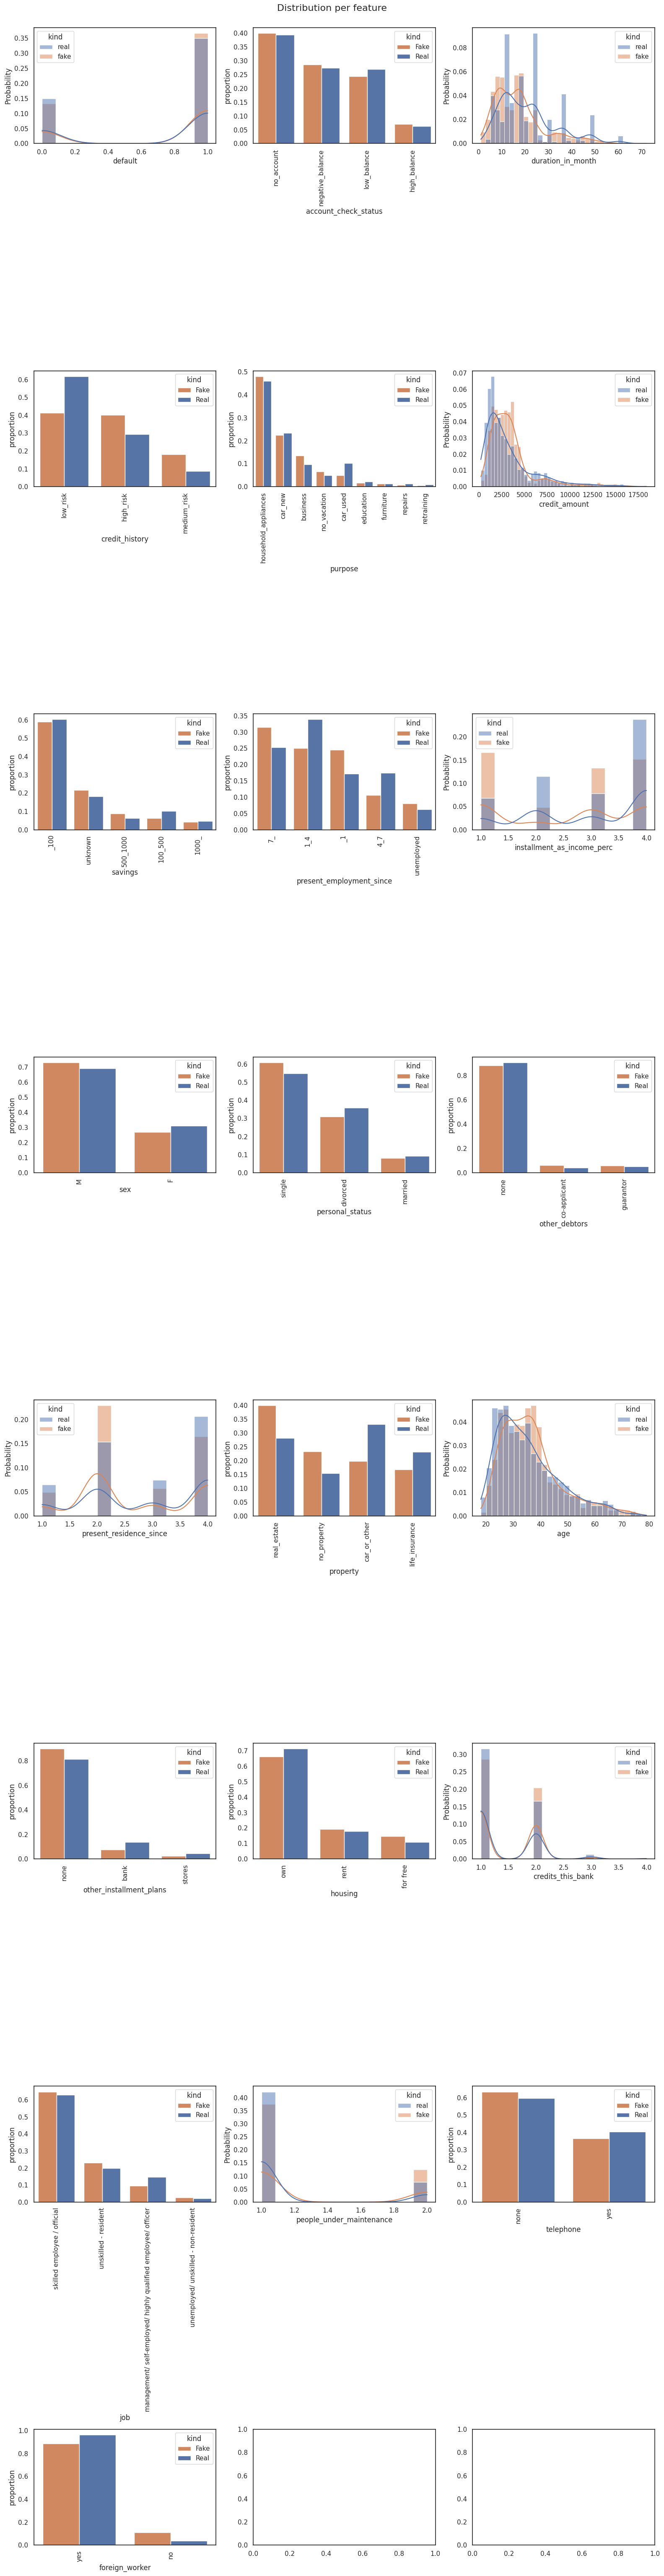

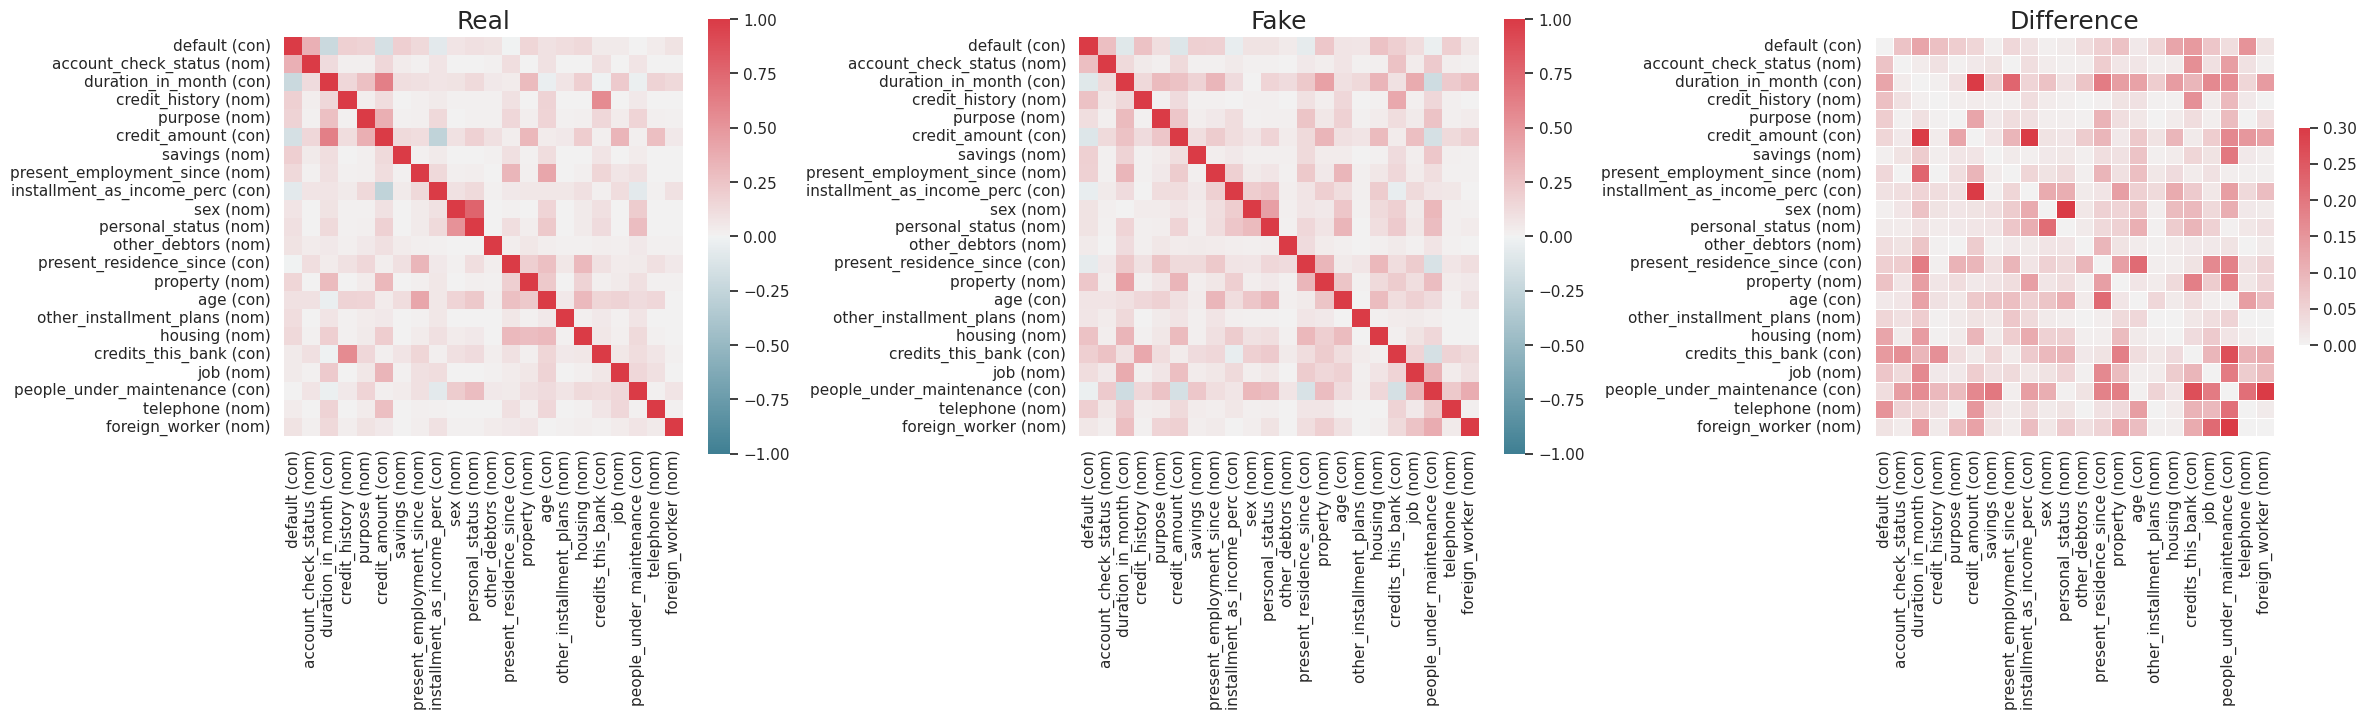

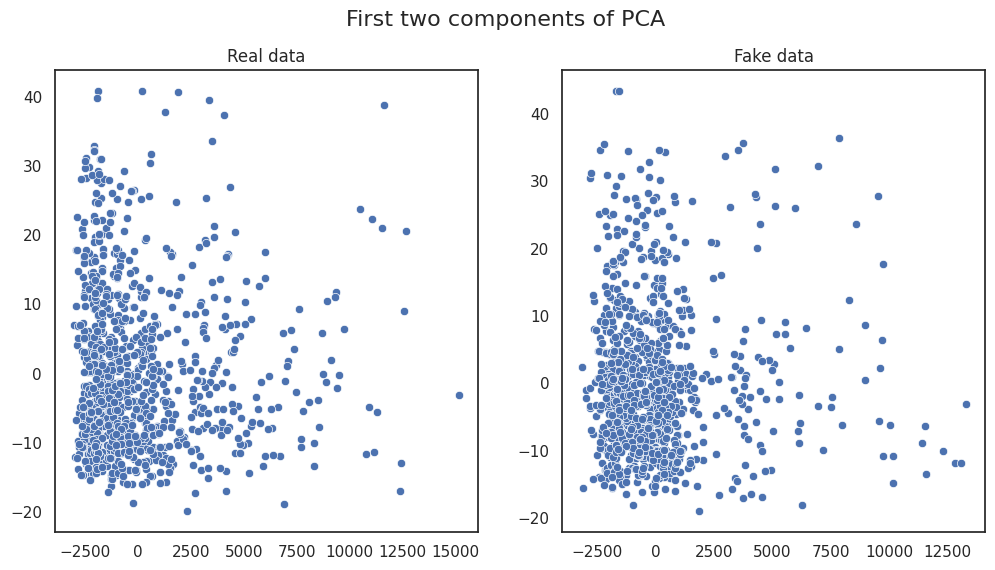

In [ ]:
from table_evaluator import TableEvaluator

print(credit.shape, samples.shape)
table_evaluator =  TableEvaluator(credit, samples, cat_cols= categorical_columns)

table_evaluator.visual_evaluation()

In [ ]:
credit_bis = credit.copy()
samples_bis = samples.copy()

In [ ]:
mappings = {}
for column in categorical_columns:
    mappings[column] = {value: code for code, value in enumerate(credit_bis[column].unique())}

codification in order to use the Nearest Neighbors model

In [ ]:
for column, map_dict in mappings.items():
    credit_bis[column] = credit_bis[column].map(map_dict)
    samples_bis[column] = samples_bis[column].map(map_dict)

Use of the Nearest Neighbors model to determine the 1000 closest samples

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Create the Nearest Neighbors model
nn = NearestNeighbors(n_neighbors=1, metric='hamming')
# Train the model on the original "credit_bis" dataframe
nn.fit(credit_bis)
# Find the closest point for each sample
distances, indices = nn.kneighbors(samples_bis)
# Sorting samples by distance
sorted_samples_bis_indices = distances.argsort(axis=0).ravel()
# Select the nearest 1000 samples
best_samples_bis = samples_bis.iloc[sorted_samples_bis_indices[:1000]]

In [ ]:
credit_bis.shape

(1000, 22)

In [ ]:
result = pd.concat([credit_bis, best_samples_bis])

In [ ]:
result = credit_bis.copy()

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# Instanciez le SMOTE
smote = SMOTE(sampling_strategy='auto')

# Update mask creation to use result
credit_history_condition = (result['credit_history'] == 1)
duration_in_month_condition = (result['duration_in_month'] == 36)
account_check_status_condition = (result['account_check_status'] ==0)
# reset the index for both result and the conditions before using them to slice the data
result.reset_index(drop=True, inplace=True)
credit_history_condition.reset_index(drop=True, inplace=True)
duration_in_month_condition.reset_index(drop=True, inplace=True)
account_check_status_condition.reset_index(drop=True, inplace=True)

slices = [credit_history_condition, duration_in_month_condition, account_check_status_condition]
for slice_condition in slices:
    slice_data = result.loc[slice_condition]
    X = slice_data.drop('default', axis=1)
    y = slice_data['default']
    # Appliquer SMOTE sur la tranche de données
    X_resampled, y_resampled = smote.fit_resample(X, y)
    # Concaténez les données amplifiées avec le DataFrame original
    resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
    result = pd.concat([result, resampled_data])


In [ ]:
result.shape

(2000, 22)

decodage

In [ ]:
for column, map_dict in mappings.items():
    reverse_map = {v: k for k, v in map_dict.items()}
    credit_bis[column] = credit_bis[column].map(reverse_map)
    samples_bis[column] = samples_bis[column].map(reverse_map)
    best_samples_bis[column] = best_samples_bis[column].map(reverse_map)
    result[column] = result[column].map(reverse_map)


In [ ]:
subslice_1 = credit[credit['credit_history'] == 'low_risk']
subslice_2 = credit[credit['purpose'] == 'Other']
subslice_3 = credit[credit['duration_in_month'] == 36]
subslice_4 = credit[credit['account_check_status'] == 'negative_balance']

print("Number of sightings:", len(credit))

print("\nNumber of observations for the slice 'credit_history == all credits at this bank paid back duly':", len(subslice_1))
print("Breakdown of the target variable for this slice:",(len(subslice_1)/len(credit))*100,'%')

print("\nNumber of observations for the slice 'purpose== ”Other”' :", len(subslice_2))
print("Breakdown of the target variable for this slice:",(len(subslice_2)/len(credit))*100,'%')

print("\nNumber of observations for the slice 'duration_in_month==36' :", len(subslice_3))
print("Breakdown of the target variable for this slice:",(len(subslice_3)/len(credit))*100,'%')

print("\nNumber of observations for the slice 'account_check_status == <0 DM':", len(subslice_4))
print("Breakdown of the target variable for this slice:",(len(subslice_4)/len(credit))*100,'%')

Number of sightings: 1000

Number of observations for the slice 'credit_history == all credits at this bank paid back duly': 619
Breakdown of the target variable for this slice: 61.9 %

Number of observations for the slice 'purpose== ”Other”' : 0
Breakdown of the target variable for this slice: 0.0 %

Number of observations for the slice 'duration_in_month==36' : 83
Breakdown of the target variable for this slice: 8.3 %

Number of observations for the slice 'account_check_status == <0 DM': 274
Breakdown of the target variable for this slice: 27.400000000000002 %


# Train the model using both real data and fake data

In [ ]:
result.shape

(2000, 22)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Split the data into train and test
Y2= result['default']
X2= result.drop(columns="default")
X_train2, X_test2, Y_train2, Y_test2 = model_selection.train_test_split(X2, Y2, test_size=0.20,random_state = 30, stratify = Y2)
# Fit and score your model
clf_logistic_regression.fit(X_train2, Y_train2)
# Use the model to predict the labels of the test set
y_pred = clf_logistic_regression.predict(X_test2)
#the probabilities for the AUC-ROC calculation
y_prob = clf_logistic_regression.predict_proba(X_test2)[:, 1]  # Probabilities of the positive class
accuracy = clf_logistic_regression.score(X_test2, Y_test2)
# Compute other metrics
positive_label = 1
# Compute other metrics
precision = precision_score(Y_test2, y_pred, pos_label=positive_label)
recall = recall_score(Y_test2, y_pred, pos_label=positive_label)
roc_auc = roc_auc_score(Y_test2, y_prob)  # Ensure Y_test2 is binarized for this, or it will raise an error

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Accuracy: 0.8275
Precision: 0.8762
Recall: 0.9020
AUC-ROC: 0.8565


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



# Train the model using real data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Fit and score your model
clf_logistic_regression.fit(X_train, Y_train)
# Use the model to predict the labels of the test set
y_pred = clf_logistic_regression.predict(X_test)
# If you need the probabilities for the AUC-ROC calculation
y_prob = clf_logistic_regression.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
accuracy = clf_logistic_regression.score(X_test, Y_test)
# Compute other metrics
positive_label =1
# Compute other metrics
precision = precision_score(Y_test, y_pred, pos_label=positive_label)
recall = recall_score(Y_test, y_pred, pos_label=positive_label)
roc_auc = roc_auc_score(Y_test, y_prob)  # Ensure Y_test is binarized for this, or it will raise an error

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Accuracy: 0.7400
Precision: 0.7973
Recall: 0.8429
AUC-ROC: 0.8181


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
# Prepare data to upload on Giskard
train_data2 = pd.concat([X_train2, Y_train2], axis=1)
test_data2 = pd.concat([X_test2, Y_test2 ], axis=1)

In [ ]:
# Prepare data to upload on Giskard
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test ], axis=1)

### Giskard

In [ ]:
from giskard import Model, GiskardClient, Dataset

# Wrap your clf with SKLearnModel from Giskard
my_model2 = Model(model=clf_logistic_regression,
                        name="Logistic Regression (sklearn)",
                        model_type="classification")

# Wrap your dataset with Dataset from Giskard
my_test_dataset2 = Dataset(test_data2.sample(200), name="testing dataset2", target="default", column_types=column_types)


/usr/local/lib/python3.10/dist-packages/giskard/core/dataset_validation.py:122: UserWarning:

Feature 'people_under_maintenance' is declared as 'numeric' but has 2 (<= category_threshold=2) distinct values. Are you sure it is not a 'category' feature?



In [ ]:
import giskard
results = giskard.scan(my_model2, my_test_dataset2)

INFO:giskard.scanner.logger:Running detectors: ['PerformanceBiasDetector', 'TextPerturbationDetector', 'EthicalBiasDetector', 'DataLeakageDetector', 'StochasticityDetector', 'OverconfidenceDetector', 'UnderconfidenceDetector', 'SpuriousCorrelationDetector']
INFO:giskard.scanner.logger:PerformanceBiasDetector: Running
INFO:giskard.scanner.logger:PerformanceBiasDetector: Calculating loss


Your model is successfully validated.
🔎 Running scan…
Running detector PerformanceBiasDetector…

INFO:giskard.scanner.logger:PerformanceBiasDetector: Loss calculated (took 0:00:00.200025)
INFO:giskard.scanner.logger:PerformanceBiasDetector: Finding data slices
INFO:giskard.scanner.logger:PerformanceBiasDetector: 39 slices found (took 0:00:01.406472)
INFO:giskard.scanner.logger:PerformanceBiasDetector: Analyzing issues
INFO:giskard.scanner.logger:PerformanceBiasDetector: Testing 39 slices for performance issues.
INFO:giskard.scanner.logger:PerformanceBiasDetector: Testing slice `present_residence_since` < 1.500	Precision = 0.615 (global 0.814) Δm = -0.244	is_issue = True
INFO:giskard.scanner.logger:PerformanceBiasDetector: Testing slice `present_residence_since` >= 1.500 AND `present_residence_since` < 3.500	Precision = 0.802 (global 0.814) Δm = -0.014	is_issue = False
INFO:giskard.scanner.logger:PerformanceBiasDetector: Testing slice `present_residence_since` >= 3.500	Precision = 0.939 (global 0.814) Δm = 0.153	is_issue = False
INFO:giskard.scanner.logger:PerformanceBiasDetector: 

 15 issues detected. (Took 0:00:03.050393)
Running detector TextPerturbationDetector… 0 issues detected. (Took 0:00:00.001285)
Running detector EthicalBiasDetector… 0 issues detected. (Took 0:00:00.000886)
Running detector DataLeakageDetector…

INFO:giskard.scanner.logger:StochasticityDetector: Running
INFO:giskard.scanner.logger:OverconfidenceDetector: Running
INFO:giskard.scanner.logger:OverconfidenceDetector: Calculating loss
INFO:giskard.scanner.logger:OverconfidenceDetector: Loss calculated (took 0:00:00.019850)
INFO:giskard.scanner.logger:OverconfidenceDetector: Finding data slices


 0 issues detected. (Took 0:00:01.779158)
Running detector StochasticityDetector… 0 issues detected. (Took 0:00:00.033684)
Running detector OverconfidenceDetector…

INFO:giskard.scanner.logger:OverconfidenceDetector: 10 slices found (took 0:00:01.628413)
INFO:giskard.scanner.logger:OverconfidenceDetector: Analyzing issues
INFO:giskard.scanner.logger:OverconfidenceDetector: Using overconfidence threshold = 0.5
INFO:giskard.scanner.logger:OverconfidenceDetector: 1 issues found (took 0:00:00.110802)
INFO:giskard.scanner.logger:UnderconfidenceDetector: Running
INFO:giskard.scanner.logger:UnderconfidenceDetector: Calculating loss
INFO:giskard.scanner.logger:UnderconfidenceDetector: Loss calculated (took 0:00:00.022094)
INFO:giskard.scanner.logger:UnderconfidenceDetector: Finding data slices


 1 issues detected. (Took 0:00:01.776452)
Running detector UnderconfidenceDetector…

INFO:giskard.scanner.logger:UnderconfidenceDetector: 46 slices found (took 0:00:02.005158)
INFO:giskard.scanner.logger:UnderconfidenceDetector: Analyzing issues
INFO:giskard.scanner.logger:UnderconfidenceDetector: 0 issues found (took 0:00:00.575508)
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: Running


 0 issues detected. (Took 0:00:02.620356)
Running detector SpuriousCorrelationDetector…

INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `credit_amount` >= 6332.500	Association = 0.066
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `credit_amount` < 1458.500	Association = 0.005
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `credit_amount` < 2260.000 AND `credit_amount` >= 1458.500	Association = 0.046
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `credit_amount` < 3523.500 AND `credit_amount` >= 2260.000	Association = 0.004
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `credit_amount` < 6332.500 AND `credit_amount` >= 3523.500	Association = 0.002
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `installment_as_income_perc` < 2.500	Association = 0.005
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `installment_as_income_perc` >= 2.500	Association = 0.005
INFO:giskard.scanner.logger:SpuriousCorrelationDetector: `present_residence_since` < 3.500	Association = 0.036
INFO:giskard.scanner.logger:SpuriousCorrela

 0 issues detected. (Took 0:00:02.452038)
Scan completed: 16 issues found. (Took 0:00:11.738781)


In [ ]:
display(results)  # in your notebook

<iframe id="scan-137063928913232" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collaps